<a href="https://colab.research.google.com/github/harshavardhansannithi/ARDS-using-Machine-learning/blob/main/Random_Forest_vs_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
# Load your dataset (replace with your actual data)
data = pd.read_csv("/content/drive/MyDrive/survey lung cancer.csv")

# Separate features and target variable
X = data.drop("LUNG_RECRUITMENT", axis=1)
y = data["LUNG_RECRUITMENT"]

In [3]:
# Feature scaling (optional)
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Assuming 'column_name' is the column containing string values
le = LabelEncoder()
X['GENDER'] = le.fit_transform(X['GENDER'])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [4]:
data.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [5]:
data["LUNG_RECRUITMENT"].describe()

count     309
unique      2
top       YES
freq      270
Name: LUNG_RECRUITMENT, dtype: object

In [6]:
X.head()
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   GENDER                 309 non-null    int64
 1   AGE                    309 non-null    int64
 2   SMOKING                309 non-null    int64
 3   YELLOW_FINGERS         309 non-null    int64
 4   ANXIETY                309 non-null    int64
 5   PEER_PRESSURE          309 non-null    int64
 6   CHRONIC DISEASE        309 non-null    int64
 7   FATIGUE                309 non-null    int64
 8   ALLERGY                309 non-null    int64
 9   WHEEZING               309 non-null    int64
 10  ALCOHOL CONSUMING      309 non-null    int64
 11  COUGHING               309 non-null    int64
 12  SHORTNESS OF BREATH    309 non-null    int64
 13  SWALLOWING DIFFICULTY  309 non-null    int64
 14  CHEST PAIN             309 non-null    int64
dtypes: int64(15)
memory usage: 36.3 KB


In [7]:
X_scaled = scaler.fit_transform(X)

In [8]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [9]:
# Random Forest Model
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)  # Experiment with hyperparameters
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)

In [13]:
# SVM Model
svm_clf = SVC(kernel='rbf')
# Experiment with different kernels and parameters
svm_clf.fit(X_train, y_train)
y_pred_svm = svm_clf.predict(X_test)

In [14]:
# Assuming 'NO' is the negative class and 'YES' is the positive class
positive_class_label = 'YES'

print("Random Forest:")
score_rf = round(accuracy_score(y_test, y_pred_rf)*100,2)
print("The accuracy score achieved using RF is: "+str(score_rf)+" %")
print(f"Precision: {precision_score(y_test, y_pred_rf, pos_label=positive_class_label)}")
print(f"Recall: {recall_score(y_test, y_pred_rf, pos_label=positive_class_label)}")
print(f"F1-score: {f1_score(y_test, y_pred_rf, pos_label=positive_class_label)}")

Random Forest:
The accuracy score achieved using RF is: 97.85 %
Precision: 0.9883720930232558
Recall: 0.9883720930232558
F1-score: 0.9883720930232558


In [18]:
# Assuming 'NO' is the negative class and 'YES' is the positive class
positive_class_label = 'YES'

print("\nSVM:")
score_svm = round(accuracy_score(y_test, y_pred_svm)*100,2)
print("The accuracy score achieved using SVM is: "+str(score_svm)+" %")
print(f"Precision: {precision_score(y_test, y_pred_svm, pos_label=positive_class_label)}")
print(f"Recall: {recall_score(y_test, y_pred_svm, pos_label=positive_class_label)}")
print(f"F1-score: {f1_score(y_test, y_pred_svm, pos_label=positive_class_label)}")



SVM:
The accuracy score achieved using SVM is: 95.7 %
Precision: 0.9659090909090909
Recall: 0.9883720930232558
F1-score: 0.9770114942528736


In [19]:
from sklearn.model_selection import cross_val_score

In [20]:
!pip install matplotlib

In [21]:
import matplotlib.pyplot as plt

The optimal n_estimators value is: 7


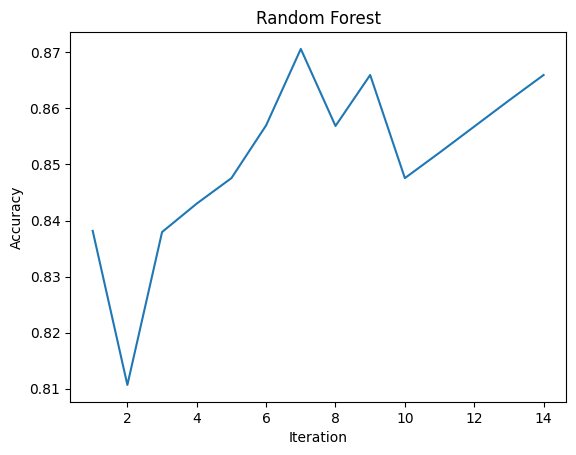

In [22]:
# Step 1: Import the NumPy module
!pip install numpy
import numpy as np

# Step 2: Re-run the code
# Assuming X_train and y_train are your training data and labels
# Perform cross-validation for different n_estimators values
n_estimators_values = list(range(1, 15))  # You can adjust the range based on your preference
cv_scores = []

for n_estimators in n_estimators_values:
    rf = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='accuracy')  # 5-fold cross-validation
    cv_scores.append(np.mean(scores))

# Find the optimal n_estimators value with the highest cross-validated accuracy
optimal_n_estimators = n_estimators_values[np.argmax(cv_scores)]
print(f"The optimal n_estimators value is: {optimal_n_estimators}")

# Plotting the cross-validated accuracy for different n_estimators values (optional)
plt.plot(n_estimators_values, cv_scores)
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Random Forest')
plt.show()

The optimal C value is: 1


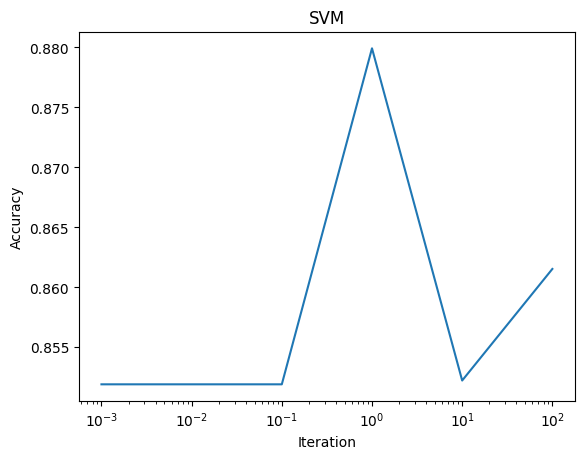

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

# Assuming X_train and y_train are your training data and labels

# Perform cross-validation for different C values
C_values = [0.001, 0.01, 0.1, 1, 10, 100]  # You can adjust the range based on your preference
cv_scores = []

for C_value in C_values:
    svm = SVC(C=C_value, random_state=42)
    scores = cross_val_score(svm, X_train, y_train, cv=5, scoring='accuracy')  # 5-fold cross-validation
    cv_scores.append(np.mean(scores))

# Find the optimal C value with the highest cross-validated accuracy
optimal_C = C_values[np.argmax(cv_scores)]
print(f"The optimal C value is: {optimal_C}")

# Plotting the cross-validated accuracy for different C values (optional)
plt.plot(C_values, cv_scores)
plt.xscale('log')  # Logarithmic scale for better visualization when C values span multiple orders of magnitude
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('SVM')
plt.show()


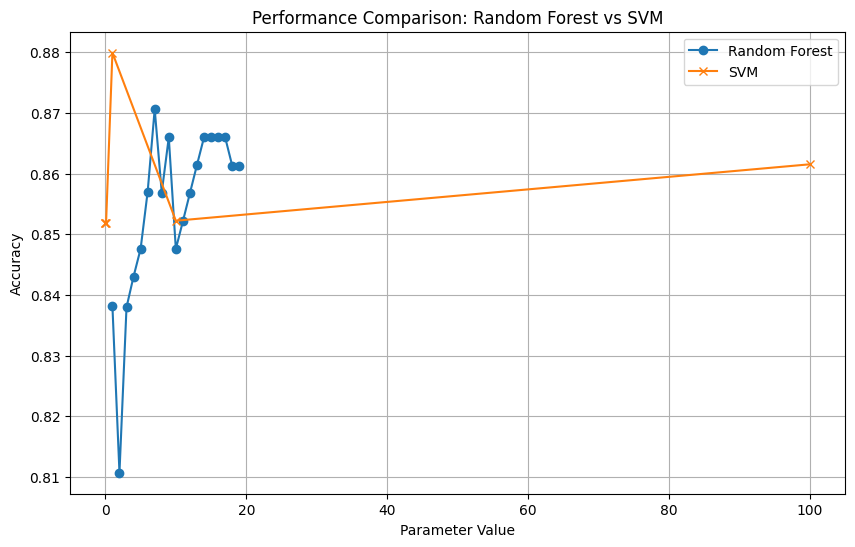

In [25]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

# Assuming X_train and y_train are your training data and labels

# Define the parameter values to evaluate
parameter_values_rf = list(range(1, 20))  # You can adjust the range based on your preference
parameter_values_svm = [0.001, 0.01, 0.1, 1, 10, 100]  # You can adjust the range based on your preference

# Initialize lists to store performance metrics for Random Forest and SVM
rf_accuracy_scores = []
svm_accuracy_scores = []

# Evaluate models for each parameter value
for param_value in parameter_values_rf:
    # Random Forest
    rf = RandomForestClassifier(n_estimators=param_value, random_state=42)
    rf_scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='accuracy')
    rf_accuracy_scores.append(np.mean(rf_scores))

for param_value in parameter_values_svm:
    # Support Vector Machine (SVM)
    svm = SVC(C=param_value, random_state=42)
    svm_scores = cross_val_score(svm, X_train, y_train, cv=5, scoring='accuracy')
    svm_accuracy_scores.append(np.mean(svm_scores))

# Plotting the performance metrics
plt.figure(figsize=(10, 6))

# Plot Random Forest performance
plt.plot(parameter_values_rf, rf_accuracy_scores, label='Random Forest', marker='o')

# Plot SVM performance
plt.plot(parameter_values_svm, svm_accuracy_scores, label='SVM', marker='x')

plt.xlabel('Parameter Value')
plt.ylabel('Accuracy')
plt.title('Performance Comparison: Random Forest vs SVM')
plt.legend()
plt.grid(True)
plt.show()


In [26]:
scores = [score_rf,score_svm]
algorithms = ["Random Forest","SVM"]

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Random Forest is: 97.85 %
The accuracy score achieved using SVM is: 95.7 %


In [27]:
import seaborn as sns

<Axes: xlabel='Algorithms', ylabel='Accuracy score'>

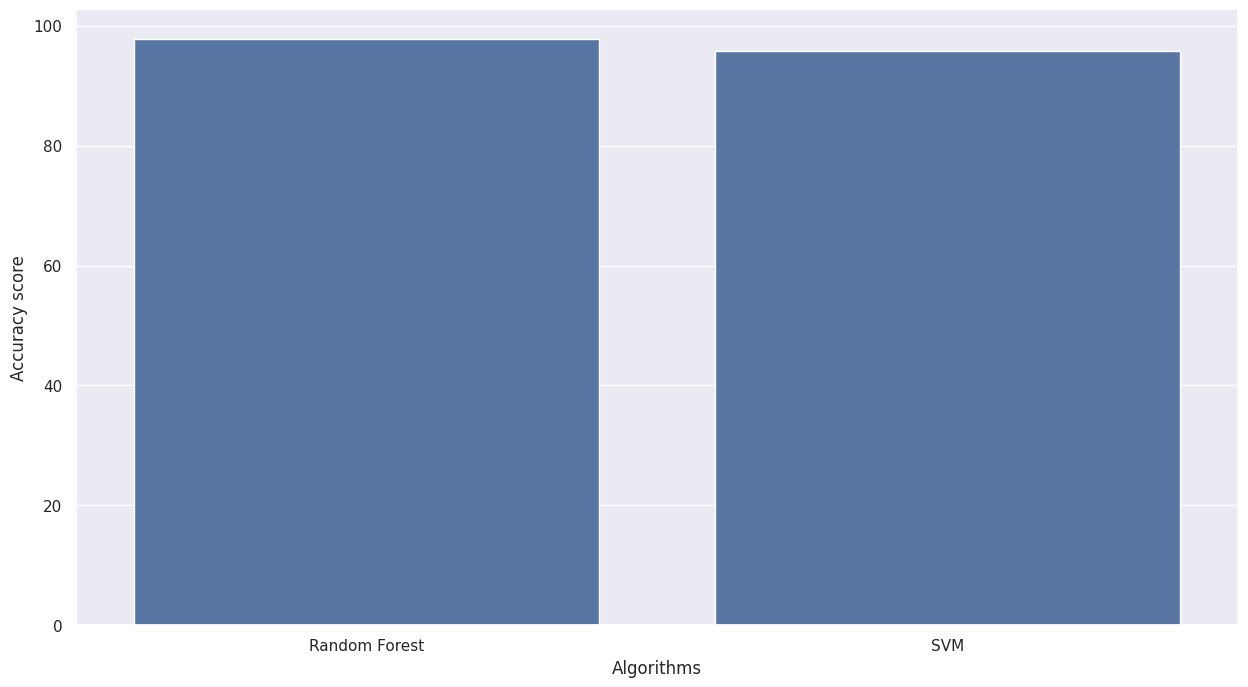

In [28]:
# Install the matplotlib module if necessary
!pip install matplotlib

# Import the matplotlib.pyplot module
import matplotlib.pyplot as plt

# Set the figure size
sns.set(rc={'figure.figsize':(15,8)})

# Set the x-axis label
plt.xlabel("Algorithms")

# Set the y-axis label
plt.ylabel("Accuracy score")

# Create a bar plot
sns.barplot(x=algorithms, y=scores)